In [85]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




In [86]:
#Exploring train and test data csv files as given in kaggle dataset to build models


train = pd.read_csv("train.csv", parse_dates=["first_active_month"])
test = pd.read_csv("test.csv", parse_dates=["first_active_month"])
print("Number of rows and columns in train set : ",train.shape)
print("Number of rows and columns in test set : ",test.shape)

Number of rows and columns in train set :  (201917, 6)
Number of rows and columns in test set :  (123623, 5)


In [87]:
# checking missing data in train
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
target,0,0.0
feature_3,0,0.0
feature_2,0,0.0
feature_1,0,0.0
card_id,0,0.0
first_active_month,0,0.0


In [88]:
# checking missing data in test
total = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_active_month,1,0.000809
feature_3,0,0.000000
feature_2,0,0.000000
feature_1,0,0.000000
card_id,0,0.000000


In [89]:
#The dataset is downloaded from kaggle.There are various csv files are given such as 
#'train.csv','test.csv','merchants.csv','historical_transactions.csv','new_merchant_transactions.csv'

#The target is about predicting the loyalty score of customers.We have to combine the data from these various 
#csv to build models and evaluate using rmse metric.

In [90]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [91]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [95]:
#lets visually explore the relationship of  various columns in train dataset w.r.t target 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


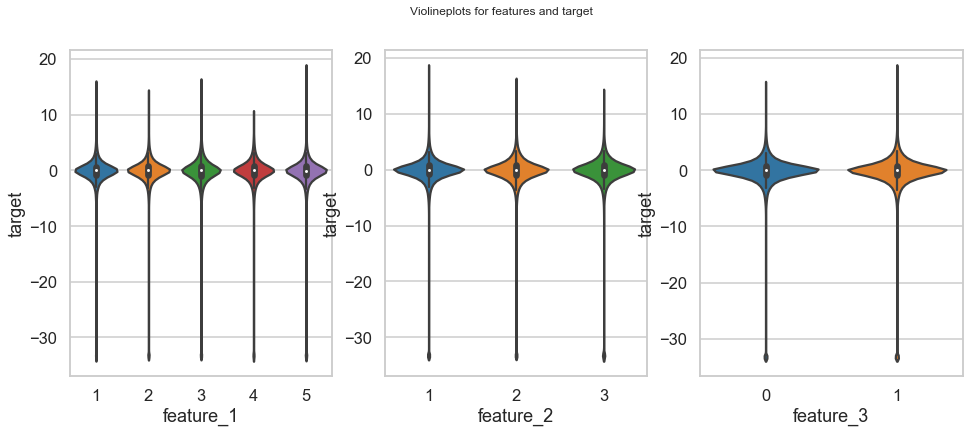

In [96]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features and target');
sns.violinplot(x="feature_1", y="target", data=train, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=train, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=train, ax=ax[2], title='feature_3');


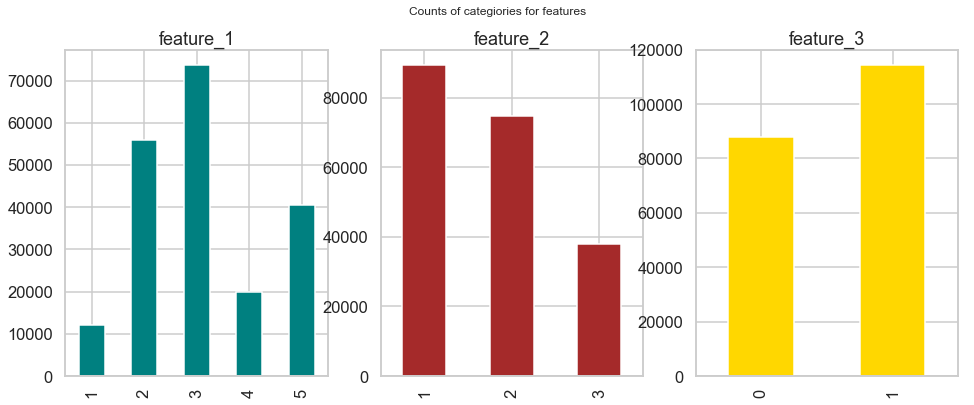

In [97]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categiories for features');

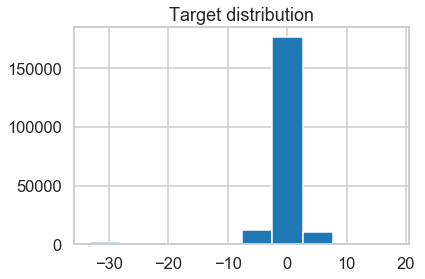

In [98]:
#distribution of target is centred towards mean .we can say that data is following normal distribution.

plt.hist(train['target']);
plt.title('Target distribution');

In [99]:
print('There are {0} samples with target lower than -20.'.format(train.loc[train.target < -20].shape[0]))

There are 2207 samples with target lower than -20.


Also observe the unique value of -30.May be we can consider as outlier.

In [100]:
#Explore about first active month in both train and test dataset

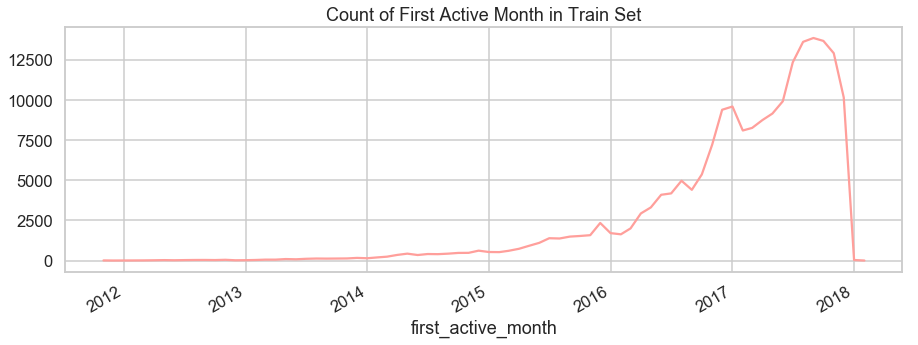

In [101]:
#train['first_active_month'] = pd.to_datetime(train['first_active_month'])
train.groupby('first_active_month').count()['card_id'].plot(figsize=(15,5),
                                                            title='Count of First Active Month in Train Set',
                                                           color='r')
plt.show()

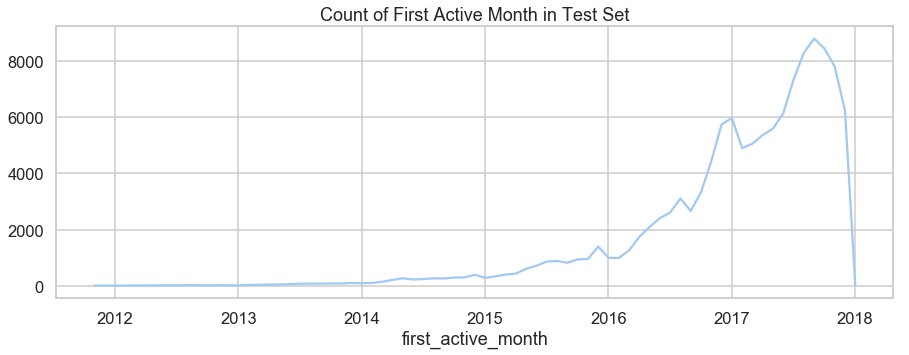

In [102]:
test.groupby('first_active_month').count()['card_id'].plot(figsize=(15,5),
                                                           title='Count of First Active Month in Test Set',
                                                          color='b')
plt.show()

In [15]:
#getting basic statistics for target variable
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [16]:
#explore the merchants.csv dataset

merchants = pd.read_csv('merchants.csv')

In [17]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [18]:
#information about various columns is provided in excel file which can be read as below.

In [19]:
d=pd.read_excel('Data_Dictionary.xlsx',sheet_name='train')

In [20]:
#d

In [21]:
#historical transactions

In [22]:
hist = pd.read_csv('historical_transactions.csv',parse_dates=["purchase_date"])

In [23]:
hist.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
#Getting to know about authorised vs unauthorised transactions.Looks like there are more numebr of authorised transactions
#than unauthorised.

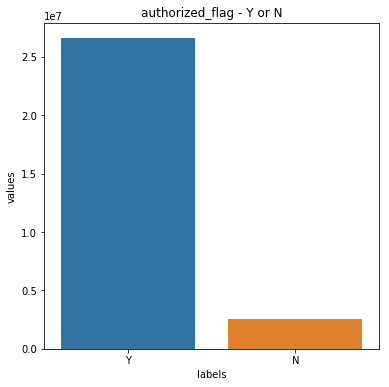

In [24]:
temp = hist["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [ ]:
#Lets explore the dataset the perticular card is has not seen in last two months

In [25]:
new_merchants = pd.read_csv('new_merchant_transactions.csv')

In [26]:
new_merchants.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [ ]:
#getting idea of peak month of transactions for train and test

In [27]:
from datetime import datetime
new_merchants['purchase_date'] = new_merchants['purchase_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

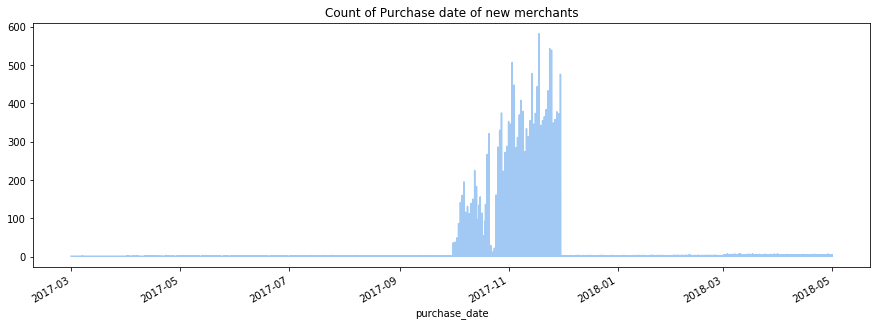

In [28]:
new_merchants.groupby('purchase_date').count()['card_id'].plot(figsize=(15,5),
                                                           title='Count of Purchase date of new merchants',
                                                          color='b')
plt.show()

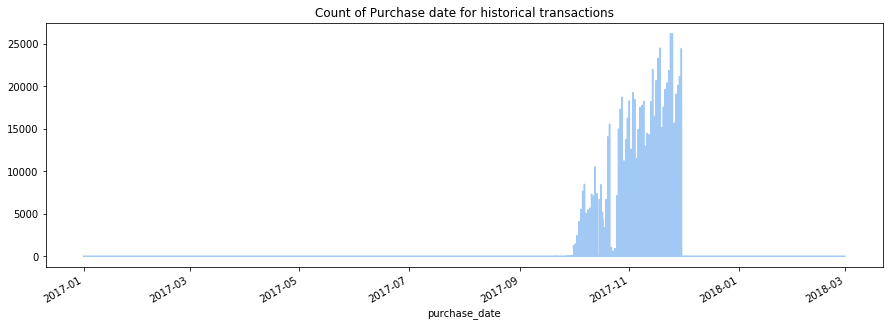

In [31]:
hist.groupby('purchase_date').count()['card_id'].plot(figsize=(15,5),
                                                           title='Count of Purchase date for historical transactions',
                                                          color='b')
plt.show()


Lets visually explore about the various categorical columns of historical and new transactions dataset

In [32]:
cat_cols = ['authorized_flag', 'category_1', 'installments','category_3', 'month_lag','category_2', 'subsector_id']

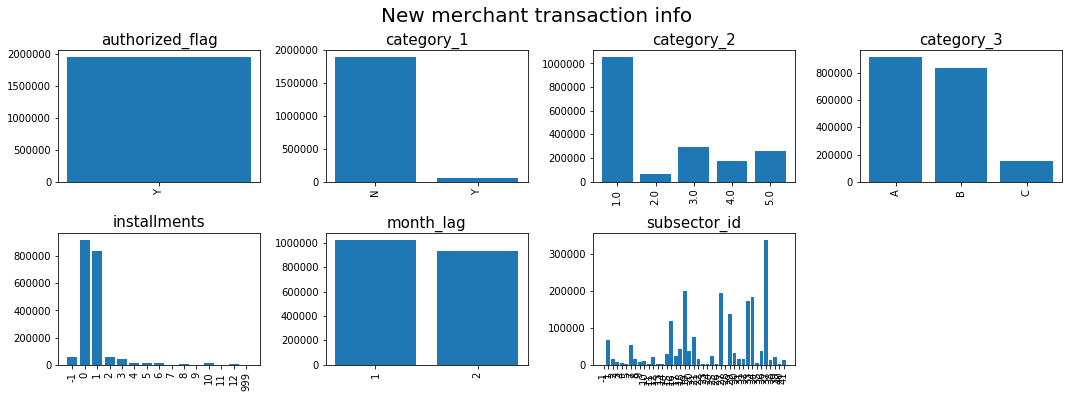

In [33]:
plt.figure(figsize=[15, 10])
plt.suptitle('New merchant transaction info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(cat_cols))/4))
last_ind = 0
for col in sorted(list(new_merchants.columns)):
    #print('processing column ' + col)
    if col in cat_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = new_merchants[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y)
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()


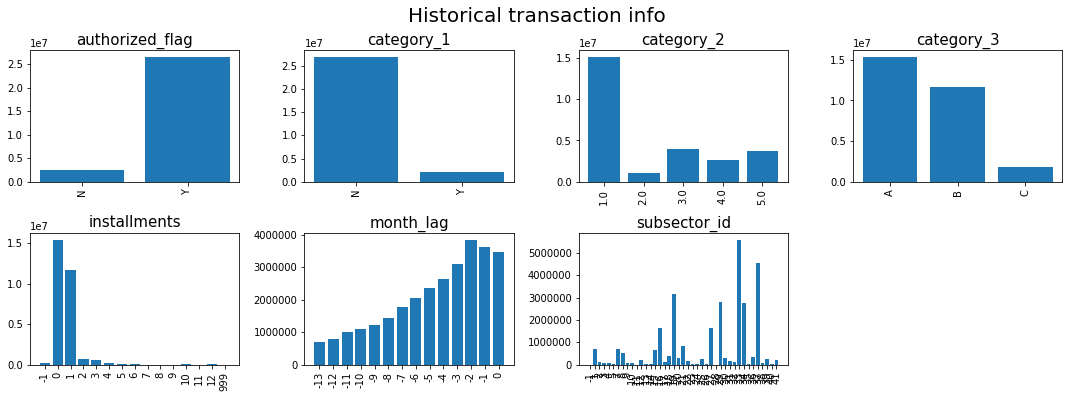

In [34]:
plt.figure(figsize=[15, 10])
plt.suptitle('Historical transaction info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(cat_cols))/4))
last_ind = 0
for col in sorted(list(hist.columns)):
    #print('processing column ' + col)
    if col in cat_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = hist[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y)
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

In [ ]:
#Lets explore the numerical columns of historical and new transactions dataset.

In [35]:
num_cols = ['purchase_amount', 'purchase_date', 'merchant_category_id', 'subsector_id']


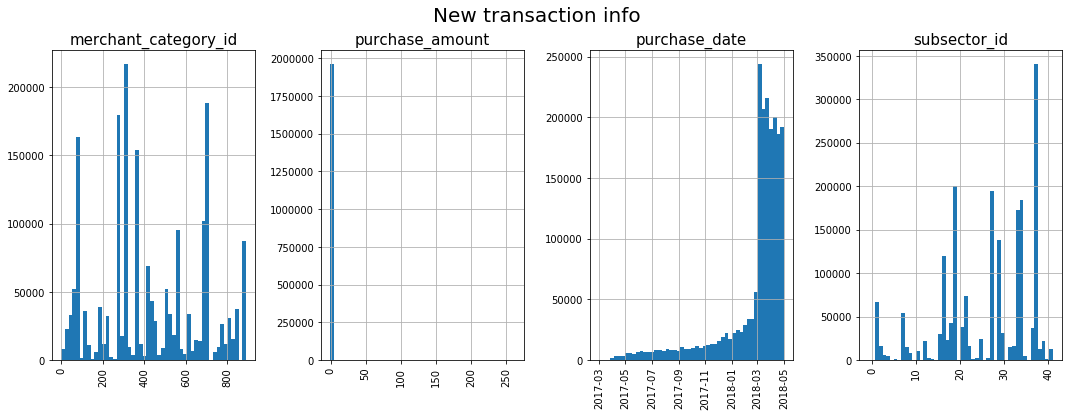

In [36]:
plt.figure(figsize=[15, 10])
plt.suptitle('New transaction info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(num_cols) + len(num_cols))/4))
last_ind = 0
for col in sorted(list(new_merchants.columns)):
    
    #print('processing column ' + col)
    if col in num_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        new_merchants[col].hist(bins = 50)
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

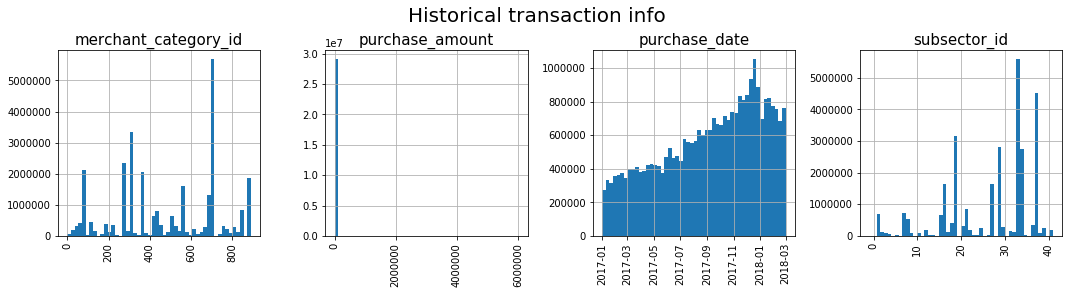

In [37]:
plt.figure(figsize=[15, 10])
plt.suptitle('Historical transaction info', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(num_cols))/4))
last_ind = 0
for col in sorted(list(hist.columns)):
    
    #print('processing column ' + col)
    if col in num_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        hist[col].hist(bins = 50)
        plt.title(col, fontsize=15)
        plt.xticks(rotation=90)
    plt.tight_layout()

In [38]:
print("shape of historical transaction:{}".format(hist.shape))

shape of historical transaction:(29112361, 14)


In [39]:
#Converting authorised flag values to numerical

In [41]:
hist['authorized_flag'] =  hist['authorized_flag'].map({'Y':1, 'N':0})

In [42]:
#filling various nan values
hist['category_2'].fillna(1.0,inplace=True)
hist['category_3'].fillna('A',inplace=True)
hist['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
hist['installments'].replace(-1, np.nan,inplace=True)
hist['installments'].replace(999, np.nan,inplace=True)


In [ ]:
#we need to aggregare historical and new merchant transactions in order to merge with train and test dataset 


In [43]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max']
        }
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

history = aggregate_historical_transactions(hist)
history[:10]

,card_id,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,hist_city_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,C_ID_00007093c1,149,114,0.765101,29,4,-76.845041,-0.587627,1.507069,-0.728876,0.298141,192.0,1.0,6.0,1.0,0.764900,32627654.0,-12,0
1,C_ID_0001238066,123,120,0.975610,65,18,-72.447201,-0.648184,0.768095,-0.734887,0.190235,201.0,1.0,10.0,1.0,1.444564,13110825.0,-5,0
2,C_ID_0001506ef0,66,62,0.939394,28,3,-34.601879,-0.703707,1.493545,-0.740491,0.472284,1.0,0.0,1.0,0.0,0.123091,34460275.0,-13,0
3,C_ID_0001793786,216,189,0.875000,119,10,-36.786013,-0.487911,4.554145,-0.745405,0.836046,5.0,0.0,1.0,0.0,0.150723,24487497.0,-9,0
4,C_ID_000183fdda,144,137,0.951389,73,9,-68.837938,-0.661294,2.764788,-0.737892,0.524948,268.0,1.0,10.0,1.0,2.093105,17492874.0,-6,0
5,C_ID_00024e244b,70,53,0.757143,19,3,-41.552753,-0.709342,2.258395,-0.740897,0.416742,5.0,0.0,1.0,0.0,0.259399,34540529.0,-13,0
6,C_ID_0002709b5a,73,67,0.917808,35,4,-47.659542,-0.677275,-0.336684,-0.727388,0.078777,130.0,1.0,12.0,1.0,2.173067,34738297.0,-13,0
7,C_ID_00027503e2,42,24,0.571429,12,2,-31.123047,-0.741213,-0.734135,-0.745871,0.003334,0.0,0.0,0.0,0.0,0.000000,20483171.0,-8,0
8,C_ID_000298032a,30,28,0.933333,20,5,-15.992416,-0.642436,2.577843,-0.719529,0.589542,0.0,0.0,0.0,0.0,0.000000,29831230.0,-11,0
9,C_ID_0002ba3c2e,70,55,0.785714,35,3,-44.342996,-0.682113,-0.097011,-0.742400,0.129401,0.0,0.0,0.0,0.0,0.000000,25571452.0,-9,0


In [44]:
history.shape

(325540, 19)

In [45]:
history.card_id.nunique()

325540

In [46]:
#merging two dataset with historical transaction aggregated variables
train = pd.merge(train, history, on='card_id', how='left')
test = pd.merge(test, history, on='card_id', how='left')


In [47]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_transactions_count,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_merchant_id_nunique,...,hist_purchase_amount_min,hist_purchase_amount_std,hist_installments_sum,hist_installments_median,hist_installments_max,hist_installments_min,hist_installments_std,hist_purchase_date_ptp,hist_month_lag_min,hist_month_lag_max
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,247,0.950000,94,...,-0.739395,0.212139,4.0,0.0,1.0,0.0,0.123314,20977987.0,-8,0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,339,0.968571,142,...,-0.742400,0.384967,545.0,1.0,10.0,1.0,1.502620,33717687.0,-12,0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,41,0.953488,13,...,-0.730138,0.087380,0.0,0.0,0.0,0.0,0.000000,35635623.0,-13,0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,77,1.000000,50,...,-0.740897,0.261624,86.0,1.0,3.0,1.0,0.484722,13375339.0,-5,0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,128,0.962406,66,...,-0.746156,1.352094,182.0,1.0,12.0,1.0,1.896862,9405641.0,-3,0


# new merchants Transactions

In [48]:
new_merchants['authorized_flag'] =  new_merchants['authorized_flag'].map({'Y':1, 'N':0})

In [49]:
def aggregate_new_transactions(new_trans):    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'month_lag': ['min', 'max']
        }
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    agg_new_trans.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    
    df = (new_trans.groupby('card_id')
          .size()
          .reset_index(name='new_transactions_count'))
    
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans

new_trans = aggregate_new_transactions(new_merchants)
new_trans[:10]

,card_id,new_transactions_count,new_authorized_flag_sum,new_authorized_flag_mean,new_merchant_id_nunique,new_city_id_nunique,new_purchase_amount_sum,new_purchase_amount_median,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_std,new_installments_sum,new_installments_median,new_installments_max,new_installments_min,new_installments_std,new_month_lag_min,new_month_lag_max
0,C_ID_00007093c1,2,2,1,2,2,-1.328524,-0.664262,-0.656749,-0.671775,0.010625,2,1.0,1,1,0.000000,2,2
1,C_ID_0001238066,26,26,1,25,8,-14.850055,-0.649235,-0.078318,-0.740897,0.173436,42,1.0,10,-1,2.079941,1,2
2,C_ID_0001506ef0,2,2,1,1,1,-1.447354,-0.723677,-0.715352,-0.732001,0.011773,0,0.0,0,0,0.000000,1,1
3,C_ID_0001793786,31,31,1,31,7,-0.229620,-0.372748,3.129932,-0.737892,0.947223,0,0.0,0,0,0.000000,1,2
4,C_ID_000183fdda,11,11,1,11,2,-6.590778,-0.665765,-0.107680,-0.732332,0.182877,16,1.0,4,-1,1.293340,1,2
5,C_ID_0002709b5a,3,3,1,3,3,-2.018827,-0.680791,-0.611669,-0.726367,0.057750,1,1.0,1,-1,1.154701,1,2
6,C_ID_000298032a,1,1,1,1,1,-0.641872,-0.641872,-0.641872,-0.641872,NaN,0,0.0,0,0,NaN,2,2
7,C_ID_0002ba3c2e,3,3,1,3,1,-2.071059,-0.697561,-0.667883,-0.705615,0.019872,0,0.0,0,0,0.000000,1,2
8,C_ID_0002c7c2c1,6,6,1,6,3,-3.929448,-0.671324,-0.497768,-0.731881,0.083328,0,0.0,0,0,0.000000,1,2
9,C_ID_00032df08f,8,8,1,7,1,-2.791535,-0.478579,0.449203,-0.640520,0.366423,8,1.0,1,1,0.000000,2,2


In [50]:
new_trans.shape

(290001, 18)

In [51]:
new_trans.card_id.nunique()

290001

In [52]:
new_trans['card_id'].isin(history['card_id']).value_counts()

True    290001
Name: card_id, dtype: int64

In [53]:
new_trans['card_id'].isin(train['card_id']).value_counts()

True     179986
False    110015
Name: card_id, dtype: int64

In [54]:
#merging earlier dataset with new transaction aggregated variables.so now final dataframe is original+historical+
# new_transactions



train = pd.merge(train, new_trans, on='card_id', how='left')
test = pd.merge(test, new_trans, on='card_id', how='left')

In [56]:
train.shape



(201917, 41)

In [57]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
new_installments_std,48718,24.127736
new_purchase_amount_std,48718,24.127736
new_month_lag_max,21931,10.861394
new_purchase_amount_median,21931,10.861394
new_authorized_flag_sum,21931,10.861394
new_authorized_flag_mean,21931,10.861394
new_merchant_id_nunique,21931,10.861394
new_city_id_nunique,21931,10.861394
new_purchase_amount_sum,21931,10.861394
new_purchase_amount_min,21931,10.861394


In [58]:
uncommon=train[(~train.card_id.isin(new_trans.card_id))]

In [59]:
uncommon.shape

(21931, 41)

In [60]:
train.dtypes

first_active_month             datetime64[ns]
card_id                                object
feature_1                               int64
feature_2                               int64
feature_3                               int64
target                                float64
hist_transactions_count                 int64
hist_authorized_flag_sum                int64
hist_authorized_flag_mean             float64
hist_merchant_id_nunique                int64
hist_city_id_nunique                    int64
hist_purchase_amount_sum              float64
hist_purchase_amount_median           float64
hist_purchase_amount_max              float64
hist_purchase_amount_min              float64
hist_purchase_amount_std              float64
hist_installments_sum                 float64
hist_installments_median              float64
hist_installments_max                 float64
hist_installments_min                 float64
hist_installments_std                 float64
hist_purchase_date_ptp            

In [61]:
type(train)

pandas.core.frame.DataFrame

In [62]:

#filling missing values with zero as these will be new card ids and not used by perticular customer.
train = train.fillna(0)

In [63]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  13


In [64]:
corr=train.corr()

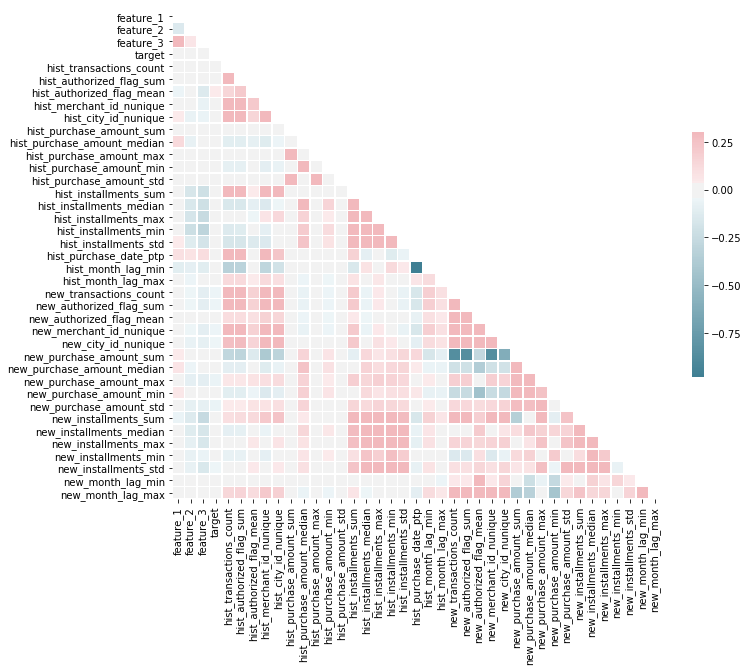

In [65]:
import numpy as np
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [66]:
corr_features

{'hist_authorized_flag_sum',
 'hist_installments_std',
 'hist_merchant_id_nunique',
 'hist_month_lag_min',
 'hist_purchase_amount_max',
 'hist_purchase_amount_std',
 'new_authorized_flag_sum',
 'new_installments_std',
 'new_merchant_id_nunique',
 'new_month_lag_max',
 'new_purchase_amount_min',
 'new_purchase_amount_std',
 'new_purchase_amount_sum'}

In [67]:
train.drop(labels=corr_features, axis=1, inplace=True)



In [68]:
train.dtypes

first_active_month             datetime64[ns]
card_id                                object
feature_1                               int64
feature_2                               int64
feature_3                               int64
target                                float64
hist_transactions_count                 int64
hist_authorized_flag_mean             float64
hist_city_id_nunique                    int64
hist_purchase_amount_sum              float64
hist_purchase_amount_median           float64
hist_purchase_amount_min              float64
hist_installments_sum                 float64
hist_installments_median              float64
hist_installments_max                 float64
hist_installments_min                 float64
hist_purchase_date_ptp                float64
hist_month_lag_max                      int64
new_transactions_count                float64
new_authorized_flag_mean              float64
new_city_id_nunique                   float64
new_purchase_amount_median        

In [69]:
def get_firstactivemonth_break_up(train):
    """splitting of starttime i,e.datetime64 type column into seperate column for hour ,day,month,year for detailed analysis"""
    date = np.array(list(map(lambda x: (x.year, x.month, x.week, x.dayofweek, x.hour), train['first_active_month'])))
    train['year']=date[:,0]
    train['month']=date[:,1]
    train['week']=date[:,2]
    train['day']=date[:,3]
    train['hour'] = date[:, 4]
    
    return train

In [70]:
train=get_firstactivemonth_break_up(train)

In [71]:
train=train.drop(['first_active_month'], axis=1)

In [72]:
train.shape

(201917, 32)

In [80]:
#train.columns

# Inferential statistics

H0 hypothesis: There is not a relationship between feature 1 and target

HA hypothesis: There is a relationship between feature1 and target




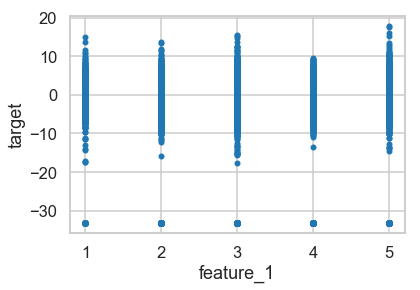

In [81]:
train.plot.scatter("feature_1", "target")



In [ ]:
from scipy import stats



To formally test homogeneity of variances, I will use the Levene’s test of homogeneity of variances which is the stats.levene() method from scipy.stats.

In [82]:
stats.levene(train['feature_1'], train['target'])



LeveneResult(statistic=6376.0340415853825, pvalue=0.0)

Levene’s test for equal variances is significant, meaning we violate the assumption of homoscedasticity. Given that, the appropriate correlation test to use would be a non-parametric test such as the Spearman rank correlation or Kendall Tau correlation test

In [130]:
train['feature_1'].corr(train['target'], method= 'spearman')


-0.0156643329340523

In [131]:
train['feature_1'].corr(train['target'])


-0.014251050661851884

In [132]:
stats.levene(train['feature_2'], train['target'])



LeveneResult(statistic=13121.415087967722, pvalue=0.0)

In [133]:
stats.levene(train['feature_3'], train['target'])



LeveneResult(statistic=19305.93792694782, pvalue=0.0)

In [134]:
train['feature_2'].corr(train['target'])



-0.006241764587570307

In [135]:
train['feature_3'].corr(train['target'])



-0.008125281060604133

We can conclude that there is no direct strong correlation bewteen these 3 anonimysed features and target indicating
we need more data in order to train model to accurately predict target.

In [ ]:
HA - Mean purchase amount is same between historical and new transactions
HB - Mean purchase amount is different between historical and new transations

Before the t-test can be conducted, the assumptions of the t-test need to be checked to see if the t-test results can be trusted.

In [138]:
stats.levene(hist['purchase_amount'], new_merchants['purchase_amount'])


LeveneResult(statistic=0.5471647706597861, pvalue=0.4594784915686013)

In [139]:
stats.ttest_ind(hist['purchase_amount'], new_merchants['purchase_amount'])


Ttest_indResult(statistic=0.7324766918255633, pvalue=0.463877669576369)

The test is not significant meaning there is homogeneity of variances and we can proceed

In [140]:
diff = hist['purchase_amount'] - new_merchants['purchase_amount']


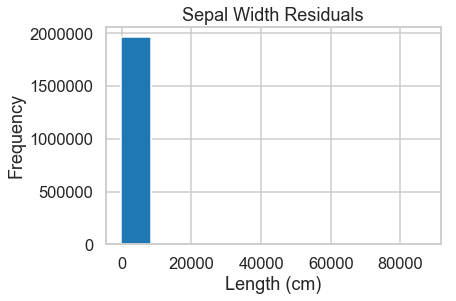

In [141]:
diff.plot(kind= "hist", title= "Purcahse amount Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Purchase amount.png")

In [ ]:
As per above histogram we violates the assumption of normal distribution so we need to perform other test such as
Welch test

In [148]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n")



In [149]:
welch_ttest(hist['purchase_amount'], new_merchants['purchase_amount'])


 Welch's t-test= 2.8208 
 p-value = 0.0048 



In [ ]:
If p <= alpha: Reject null hypothesis that the means are equal.
So we can conclude that the means value of purchase amount is different for historical transations and new transactions.

In [ ]:
HA - Mean installments is same between historical and new transactions
HB - Mean installments is different between historical and new transations

In [190]:
x = hist.installments

In [191]:
df = pd.DataFrame(x,columns=['installments'])

In [197]:
df=df.fillna(0)

In [193]:
y = new_merchants.installments

In [194]:
df1 = pd.DataFrame(y,columns=['installments'])

In [198]:
df1=df1.fillna(0)

In [199]:
stats.ttest_ind(df['installments'], df1['installments'])



Ttest_indResult(statistic=-39.36818909972307, pvalue=0.0)

If p <= 0.05: Reject null hypothesis that the means are equal.
So we can conclude that the means value of installments is different for historical transations and new transactions.